# Dreams of Health: Unlocking the Power of Sleep for Better Lives
    LAGCC Data Analytics 
    Shelley Shen 

## Table of Contents
1. Introduction
2. Data import
3. Data wrangling
4. Data exploration, data visualization, and statistical analysis
5. Conclusion 

## 1. Introduction

This project explores the Sleep Health and Lifestyle dataset from Kaggle to understand how various factor may impact sleep health. The dataset contains 374 rows and 13 columns with variables relating to sleep, health conditions, and daily living. 

**Research Questions:**
- What is the relationship between sleep duration and overall health outcomes? 
- How does sleep quality affect mental health indicators such as depression and anxiety? 
- Can lifestyle factors, such as exercise or stress level, impact sleep duration? 
- Are there any associations between sleep patterns and BMI? 
- Can sleep data be used to identify individuals at risk for sleep disorders like insomnia or sleep apnea? 

**Key features of the dataset:**
- Person ID: identifier for each observation
- Gender: gender (male/female)
- Age: age in years
- Occupation: occupation or profession
- Sleep duration (hours): number of hours slept per day
- Quality of sleep (scale 1-10): subjective rating of quality of sleep
- Physical activity level (minutes/day):number of minutes engaged in physical activity per day
- Stress level (scale 1-10): subjective rating of stress level experienced
- BMI category: BMI category (underweight, normal, overweight)
- Blood pressure: blood pressurement measurement (systolic/diastolic)
- Heart rate (bpm): resting heart rate
- Daily steps: number of steps taken per day
- Sleep disorder: presence or absence of sleep disorder (none, insomnia, sleep apnea) 

The data file's origin and method of data collection of the data file are unknown, thus limiting the credibility of this analysis. 


## 2. Data import
The relevant libraries are loaded, dataset imported, and data previewed.

In [ ]:
# load libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import janitor
%matplotlib inline

In [62]:
raw_df = pd.read_csv('https://raw.githubusercontent.com/shelleysh/LAGCC-Data-Analytics/main/sleep_health_and_lifestyle_dataset.csv').clean_names()

In [28]:
# review variables in dataset 
raw_df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'sleep_duration',
       'quality_of_sleep', 'physical_activity_level', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')

In [31]:
# preview first few rows of dataset
raw_df.head()

,person_id,gender,age,occupation,sleep_duration,quality_of_sleep,physical_activity_level,stress_level,bmi_category,blood_pressure,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


## 3. Data wrangling
Clean the data to prepare for analysis

In [63]:
#rename columns
df = raw_df.rename(columns = {'person_id': 'id', 'quality_of_sleep': 'sleep_quality', 'physical_activity_level': 'physical_activity'})  

In [64]:
# separate blood pressure into systolic and diastolic blood pressure
def bloodpressure(x):
    sys, dia = map(int,x.split('/'))
    return [sys, dia]
bp = np.array(list(raw_df['blood_pressure'].apply(lambda x: bloodpressure(x))))
df.insert(10, 'systolic_bp', bp.T[0])
df.insert(11, 'diastolic_bp', bp.T[1])

df

,id,gender,age,occupation,sleep_duration,sleep_quality,physical_activity,stress_level,bmi_category,blood_pressure,systolic_bp,diastolic_bp,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,126,83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,125,80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,125,80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,140,90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea


In [163]:
# recode BMI category value to aggregate weights that are normal
df['bmi_category'] = df['bmi_category'].replace('Normal Weight', 'Normal')

,id,gender,age,occupation,sleep_duration,sleep_quality,physical_activity,stress_level,bmi_category,blood_pressure,systolic_bp,diastolic_bp,heart_rate,daily_steps,sleep_disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,126,83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,125,80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,125,80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,140,90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,140,90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,140,95,68,7000,Sleep Apnea


In [65]:
# identify any missing values
df.isnull().sum()

id                   0
gender               0
age                  0
occupation           0
sleep_duration       0
sleep_quality        0
physical_activity    0
stress_level         0
bmi_category         0
blood_pressure       0
systolic_bp          0
diastolic_bp         0
heart_rate           0
daily_steps          0
sleep_disorder       0
dtype: int64

## 4. Data exploration and visualization
Review values of several columns to understand diversity of data values. 

### 4a. Understanding the data with descriptive statistics
Describe the data with counts of the column values and general descriptive statistics

In [238]:
df.describe()

,id,age,sleep_duration,sleep_quality,physical_activity,stress_level,systolic_bp,diastolic_bp,heart_rate,daily_steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,128.553476,84.649733,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,7.748118,6.161611,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,115.000000,75.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,125.000000,80.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,130.000000,85.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,135.000000,90.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,142.000000,95.000000,86.000000,10000.000000


In [66]:
df['gender'].value_counts()

Male      189
Female    185
Name: gender, dtype: int64

In [243]:
df['age'].mean()

42.18449197860963

Text(0, 0.5, 'Number of Individuals')

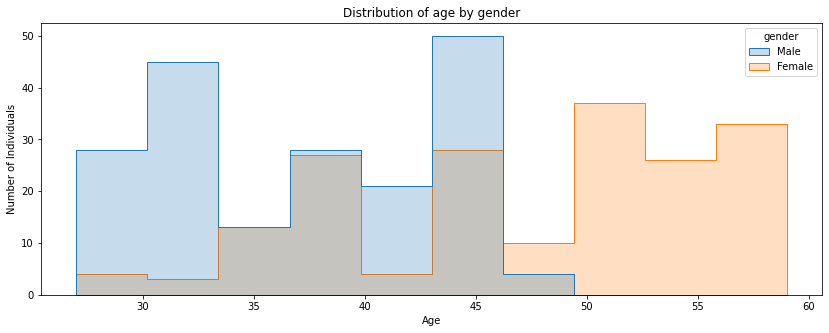

In [242]:
plt.figure(figsize=(14, 5))
sns.histplot(df, x="age", hue="gender", element="step")
plt.title("Distribution of age by gender")
plt.xlabel('Age')
plt.ylabel('Number of Individuals')

In [67]:
df['occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: occupation, dtype: int64

In [68]:
df['sleep_quality'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: sleep_quality, dtype: int64

In [71]:
df['stress_level'].value_counts().sort_values(ascending=False)

3    71
4    70
8    70
5    67
7    50
6    46
Name: stress_level, dtype: int64

In [222]:
df['bmi_category'].value_counts()

Normal        216
Overweight    148
Obese          10
Name: bmi_category, dtype: int64

In [225]:
df['sleep_disorder'].value_counts()

(raw_df['sleep_disorder'].value_counts()/raw_df['sleep_disorder'].value_counts().sum())*100 #calculate percent

None           58.556150
Sleep Apnea    20.855615
Insomnia       20.588235
Name: sleep_disorder, dtype: float64

### 4b. Exploring the relationships between different variables with data visualizations 

**Sleep duration and sleep quality by gender**

Sleep quality increases when sleep duration increases. Overall, females tend to sleep for shorter amounts of time than males.

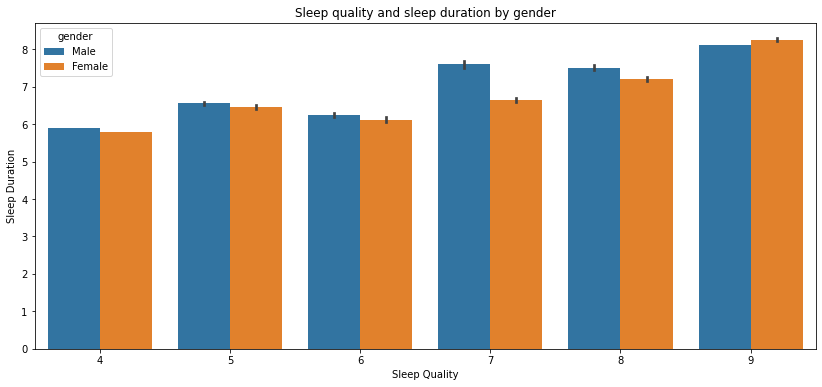

In [241]:
#sleep duration and sleep quality
plt.figure(figsize=(14, 6))
sns.barplot(data=df,
            x='sleep_quality',
            y='sleep_duration',
            hue='gender'
           )
plt.title("Sleep quality and sleep duration by gender")
plt.xlabel('Sleep Quality')
plt.ylabel('Sleep Duration')
plt.show()

**Sleep duration and quality by occupation**

Engineers, lawyers, and accountants experience the highest quality and length of sleep compared to other professions, espeically sales representatives, scientists and salespeople. Looking at sleep duraiton adn sleep quality, it seems that sleep quality improves with sleep duration. The greatest difference between sleep quality and duration are when both values are low and among sales representatives. 

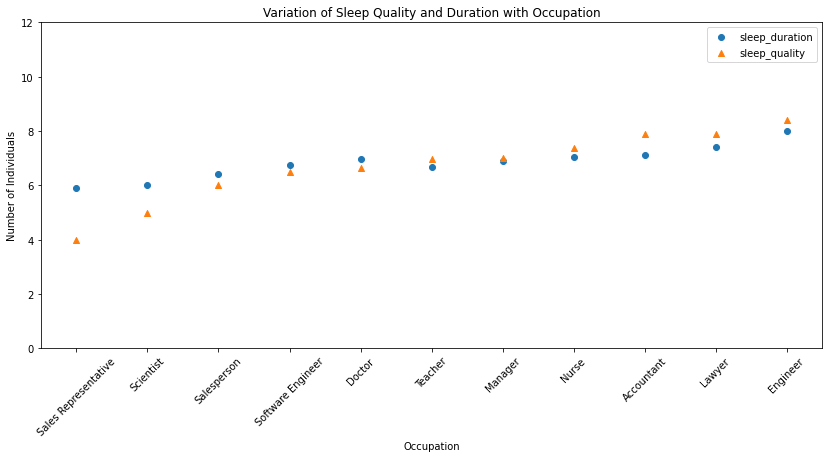

In [245]:
# sleep quality and duration by occupation

df_occupation = df.groupby('occupation')[['sleep_quality', 'sleep_duration']].mean().sort_values(by=['sleep_quality'])

plt.figure(figsize=(14, 6))
ax = plt.subplot(1, 1, 1)
x = pd.Series(df_occupation.index,dtype='category')
ax.scatter(x,y=df_occupation['sleep_duration'].to_numpy())
ax.scatter(x,y=df_occupation['sleep_quality'].to_numpy(),marker='^')
plt.xticks(rotation=45)
plt.legend(['sleep_duration','sleep_quality'])
plt.ylim(0,12)
plt.title('Variation of Sleep Quality and Duration with Occupation')
plt.xlabel('Occupation')
plt.ylabel('Number of Individuals')
plt.show()

**Physical activity and sleep duration and quality**

There is a strong positive association between physical activity and sleep duration. As the number of minutes of exercise per day increases, the hours of sleep slept also increases. The exceptions are for some females at the extremities of physical activity where this relationship is inverse: little exercise correlates with longer sleep and significant amount of exercise correlates with little sleep.

The positive association between physical activity and sleep quality is not as strong as that for sleep duration. 

Text(0, 0.5, 'Sleep Duration')

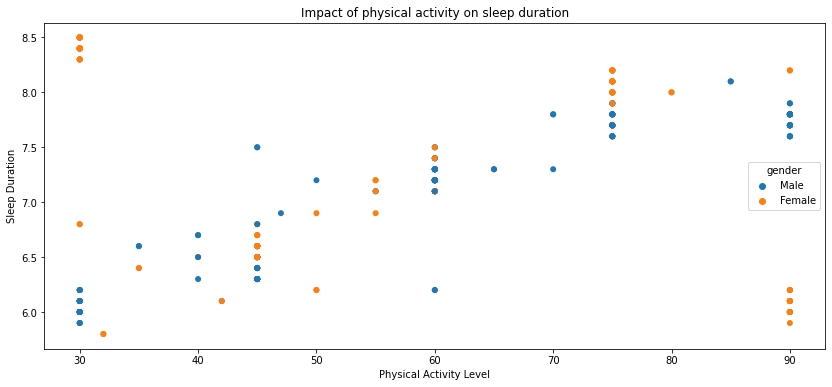

In [234]:
# sleep duration and physical activity
plt.figure(figsize=(14, 6))
sns.scatterplot(x="physical_activity", 
                y="sleep_duration",
                hue="gender",
                sizes=(1, 8), 
                linewidth=0,
                data=df)
plt.title('Impact of physical activity on sleep duration')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Duration')

Text(0, 0.5, 'Sleep Quality')

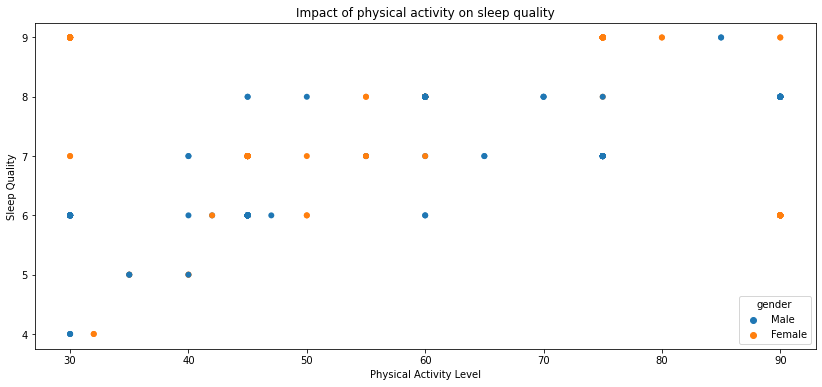

In [235]:
# sleep duration and physical activity
plt.figure(figsize=(14, 6))
sns.scatterplot(x="physical_activity", 
                y="sleep_quality",
                hue="gender",
                sizes=(1, 8), 
                linewidth=0,
                data=df)
plt.title('Impact of physical activity on sleep quality')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Quality')

**Stress level and sleep duration**

Stress level appears to have a negative relationship with sleep duration. As stress levels increases, the length of sleep per night decreases.

Text(0, 0.5, 'Sleep Duration')

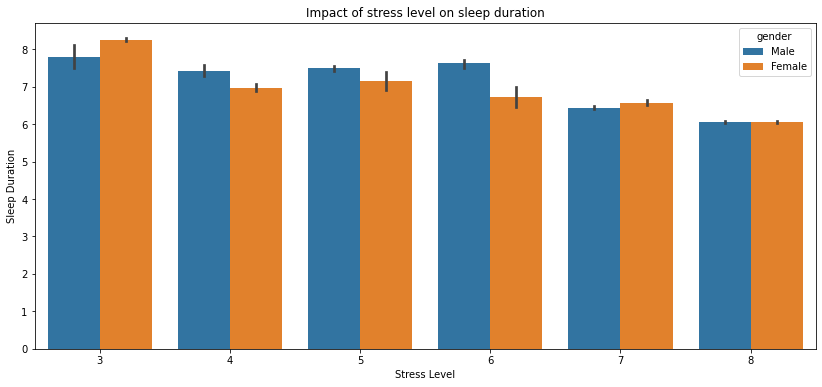

In [236]:
# sleep duration and stress level
plt.figure(figsize=(14, 6))
sns.barplot(x='stress_level', 
            y='sleep_duration',
            hue='gender',
           data=df)
plt.title('Impact of stress level on sleep duration')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')

**Stress level and sleep quality**

Stress level appears to have a negative relationship with sleep quality. As stress levels increases, the quality of sleep per night decreases.

Text(0, 0.5, 'Sleep Quality')

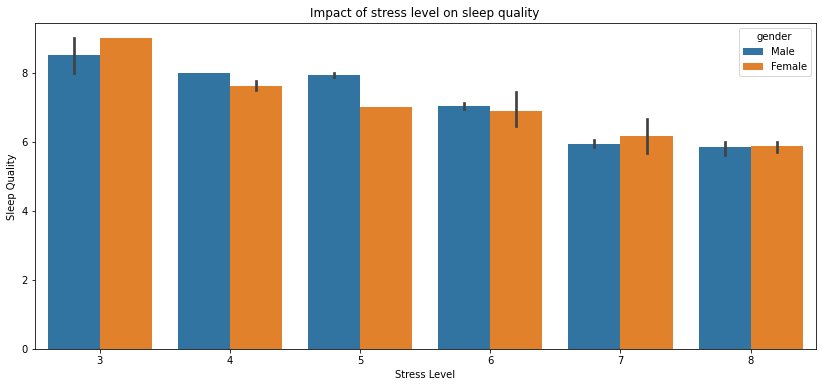

In [237]:
# sleep quality and stress level
plt.figure(figsize=(14, 6))
sns.barplot(x='stress_level', 
            y='sleep_quality',
            hue='gender',
           data=df)
plt.title('Impact of stress level on sleep quality')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')

**Body mass index (BMI) and sleep quality**

Sleep quality decreases as the BMI increases. On average, sleep quality was lowest for the obese category, in the middle for the overweight category and highest for the normal BMI category. 

Text(0, 0.5, 'Sleep Quality')

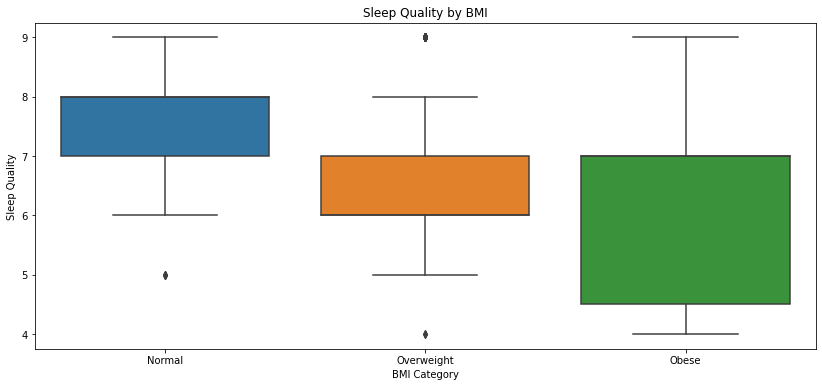

In [248]:
# sleep quality and bmi
plt.figure(figsize=(14, 6))
sns.boxplot(x='bmi_category', 
            y='sleep_quality',
            order=['Normal', 'Overweight', 'Obese'],
            data=df)
plt.title('Sleep Quality by BMI')
plt.xlabel('BMI Category')
plt.ylabel('Sleep Quality')

**Sleep disorder and sleep quality and duration**
Sleep quality and duration are both lowest for individuals with insomnia. Sleep quality and duration for individuals with sleep apnea are lower than those without any sleep disorders and higher than those with insomnia. 

Text(0, 0.5, 'Sleep Quality')

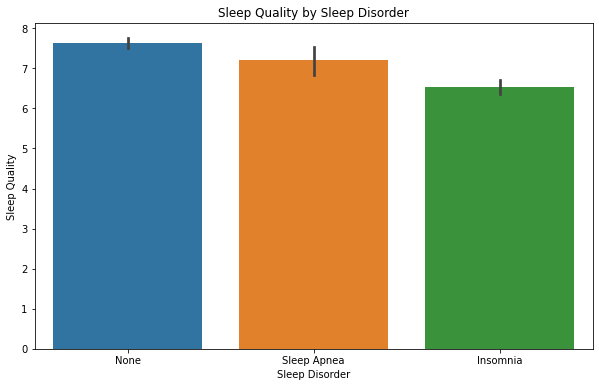

In [249]:
plt.figure(figsize=(10, 6))
sns.barplot(x='sleep_disorder',
            y='sleep_quality',
            data=df)
plt.title('Sleep Quality by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Quality')

Text(0, 0.5, 'Sleep Duration')

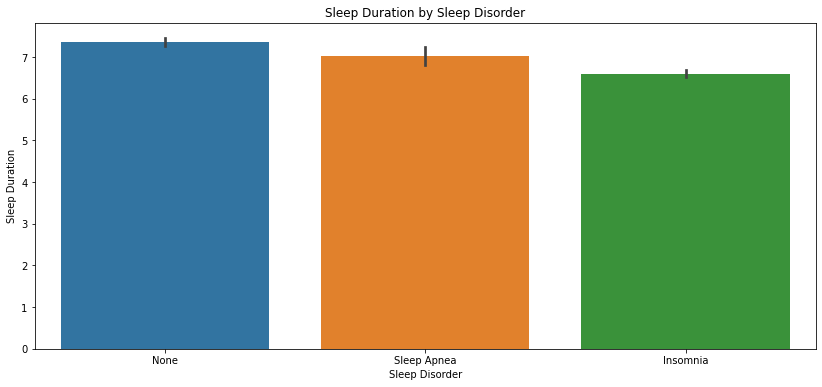

In [212]:
plt.figure(figsize=(14, 6))
sns.barplot(x='sleep_disorder',
            y='sleep_duration',
            data=df)
plt.title('Sleep Duration by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Sleep Duration')

## 4c. Statistical analysis
A correlation matrix is used to show how strong and in what direction two or more variables are related. From the matrix and the heatmap, the variables with the strongest positive correlation are between sleep duration and sleep quality. The variables with the strongest negative correlation are between stress level and sleep quality as well as stress level and sleep duration. 

In [179]:
# correlation matrix
df.corr()

,id,age,sleep_duration,sleep_quality,physical_activity,stress_level,systolic_bp,diastolic_bp,heart_rate,daily_steps
id,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,0.611551,0.590670,-0.225467,0.043844
age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,0.605878,0.593839,-0.225606,0.057973
sleep_duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.180406,-0.166570,-0.516455,-0.039533
sleep_quality,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.121632,-0.110151,-0.659865,0.016791
physical_activity,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.265416,0.382651,0.136971,0.772723
stress_level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.102818,0.091811,0.670026,0.186829
systolic_bp,0.611551,0.605878,-0.180406,-0.121632,0.265416,0.102818,1.000000,0.972885,0.294143,0.103342
diastolic_bp,0.590670,0.593839,-0.166570,-0.110151,0.382651,0.091811,0.972885,1.000000,0.271092,0.241986
heart_rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,0.294143,0.271092,1.000000,-0.030309
daily_steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,0.103342,0.241986,-0.030309,1.000000


Text(0.5, 1.0, 'Correlation between sleep health and lifestyle factors')

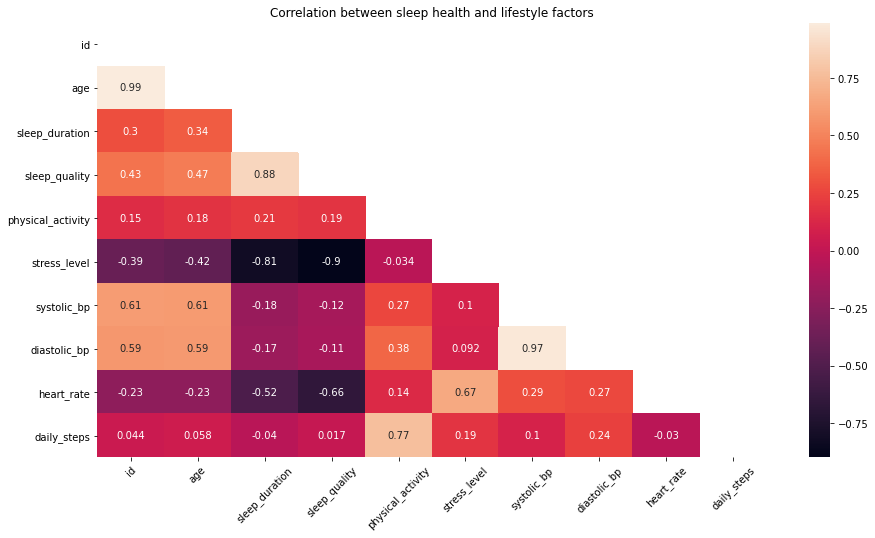

In [217]:
#heat map to visualize correlation
corr = df.corr()
matrix = np.triu(corr) #create upper triangle of correlation matrix
sns.heatmap(corr, annot=True, mask=matrix) #use upper triangle matrix as mask 
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
plt.title('Correlation between sleep health and lifestyle factors')

## 5. Conclusion 

From this analysis, we found the following: 

- Females sleep for shorter lengths of time than males.
- Sleep quality and sleep duration are correlated. Sleep quality improves with sleep duration. 
- Engineers, lawyers, accountants experience the highest quality and duration of sleep. Sales representatives and scientists experience the lowest quality and duration of sleep. 
- Increased physical activity is associated with longer sleep duration but not necessarily quality of sleep. 
- Stress level is the most significant factor for sleep health. High stress levels are associated with the lowest sleep quality and duration. 
- BMI is correlated with sleep quality. Obese individuals experience the lowest average quality of sleep, followed by those who are overweight. 
- Individuals with insomniacs experience the worst sleep quality and sleep duration compared to either those with sleep apnea or with no sleep disorders. 

The dataset and analysis have several limitations, including small sample size, incomplete data not representing all age ranges, sleep quality categories, or bmi, and lack of definition of the stress level variable. Given these limitations, further analysis must be performed with a larger, more comprehensive dataset to draw definitive conclusions. 

Future exploration can explore the relationship between sleep health with other factors such as other chronic conditions, emotional wellbeing, social engagement, self-esteem, access to care, neighborhood environment, productivity levels, screen time, driving and occupational safety, and racial discrimination. 